In [ ]:
from pilotnet_nas import createModel
from util import

2025-05-03 19:09:43.796951: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-03 19:09:43.797946: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 19:09:43.818362: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 19:09:43.818591: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-03 19:09:44.171811: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

ModuleNotFoundError: No module named 'utils'

10 10


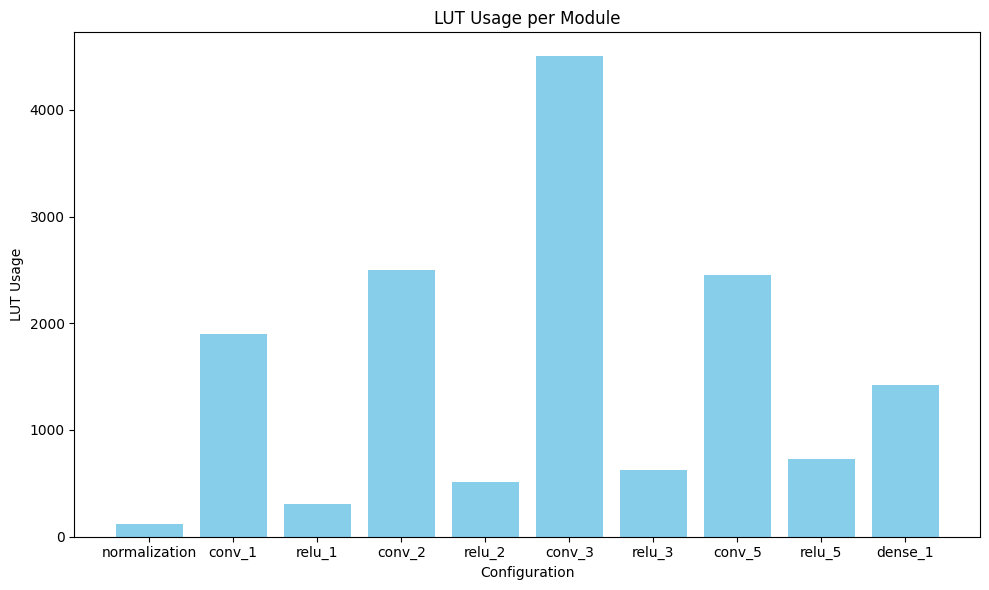

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Manually define the table rows (excluding total row)
data = [
    ("conv_2d_cl_array_ap_fixed_1u_array_ap_fixed_20_9_5_3_0_2u_config3_U0",    1903),
    ("conv_2d_cl_array_ap_ufixed_2u_array_ap_fixed_19_9_5_3_0_4u_config6_U0",   2496),
    ("conv_2d_cl_array_ap_ufixed_4u_array_ap_fixed_20_10_5_3_0_5u_config9_U0",  4502),
    ("conv_2d_cl_array_ap_ufixed_5u_array_ap_fixed_19_9_5_3_0_6u_config12_U0",  2450),
    ("dense_array_ap_ufixed_6u_array_ap_fixed_19_9_5_3_0_1u_config16_U0",       1425),
    ("linear_array_ap_uint_1u_array_ap_fixed_8_1_4_0_0_1u_linear_config2_U0",   118),
    ("relu_array_ap_fixed_2u_array_ap_ufixed_6_0_4_0_0_2u_relu_config5_U0",     310),
    ("relu_array_ap_fixed_4u_array_ap_ufixed_6_0_4_0_0_4u_relu_config8_U0",     514),
    ("relu_array_ap_fixed_5u_array_ap_ufixed_6_0_4_0_0_5u_relu_config11_U0",    627),
    ("relu_array_ap_fixed_6u_array_ap_ufixed_6_0_4_0_0_6u_relu_config14_U0",    724),
]

# Extract configX number using regex and store as tuples
processed = []
for name, lut in data:
    match = re.search(r'config(\d+)', name)
    if match:
        config_num = int(match.group(1))
        processed.append((config_num, lut))

# Sort by config number
processed.sort(key=lambda x: x[0])

# Separate for plotting
configs = ["normalization", "conv_1", "relu_1", "conv_2", "relu_2", "conv_3", "relu_3", "conv_5", "relu_5", "dense_1"]
luts = [x[1] for x in processed]
print(len(configs), len(luts))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(configs, luts, color='skyblue')
plt.xlabel("Configuration")
plt.ylabel("LUT Usage")
plt.title("LUT Usage per Module")
plt.tight_layout()
plt.show()